In [1]:
from __future__ import division
import numpy as np
from matplotlib import animation, rcParams
from matplotlib import pyplot as plt
from matplotlib.artist import setp
rcParams['figure.figsize'] = 12, 8.5
from matplotlib.pyplot import Line2D
import scipy.linalg as la
from scipy import sparse
from scipy.optimize import fsolve

# Problem 1

Consider the initial boundary value problem

$$
u_{tt} = u_{xx},
$$
$$
u(0, t) = u(1, t) = 0,
$$
$$
u(x, 0) = sin(2πx),
$$
$$
u_t(x, 0) = 0.
$$

Numerically approximate the solution u(x, t) for t ∈ [0, .5]. Use J = 50 subintervals in the x
dimension and M = 50 subintervals in the t dimension. Animate the results. Compare your
results with the analytic solution u(x, t) = sin (2πx) cos (2πt). This function is known as a
standing wave. See Figure 7.1.

In [2]:
def animate(X, U, title):
    # turn off display while rendering
    plt.ioff()    
    n = U.shape[0] 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))    
    # create the lines for the heat distribution
    solution, = plt.plot([], [], color='b', label='solution')    
    def update(i):
        # At each frame update the plot
        solution.set_data(X, U[i,:])        
        return solution    
    
    # here we plot and animate the plot
    plt.legend()
    animation.writer = animation.writers['ffmpeg']
    plt.title('Animation of Solution to Wave Equation')
    ani = animation.FuncAnimation(fig, update, frames=range(n), interval=100)
    ani.save(f'{title}.mp4')
    plt.ion()
    plt.close()

In [3]:
def finite_diff(f, g, s, xbounds, tbounds, xsteps, tsteps):
    J = xsteps
    M = tsteps
    # Set up values for computations
    del_x = (xbounds[1] - xbounds[0]) / J
    del_t = (tbounds[1] - tbounds[0]) / M
    lamda = s * del_t / del_x

    #Empty solution matrix
    U = np.zeros((M+1,J+1))
    # Initial conditions at time step 1 and 2
    X = np.linspace(xbounds[0], xbounds[1], J+1)[1:-1]
    U[0,1:-1] = [f(x) for x in X]
    U[1,1:-1] = U[0,1:-1] + g(X)*del_t + (lamda**2/2)*(U[0,:-2]-2*U[0,1:-1]+U[0,2:])
    
    X = np.linspace(xbounds[0], xbounds[1], J+1)[1:-1]
    # Set up A matrix
    lamda_sq = lamda**2 * np.ones(J)
    A =  np.diag(np.ones(J+1) * 2*(1-lamda**2), 0) + np.diag(lamda_sq, -1) + np.diag(lamda_sq, 1)

    for m in range(1, M):
        U[m+1,:] = A @ U[m, :] - U[m-1, :]
        
    return U

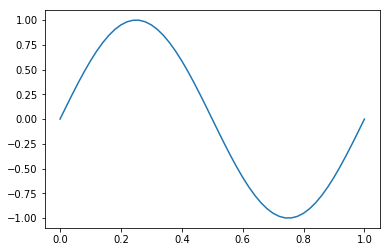

In [6]:
xbounds = [0, 1]
tbounds = [0, 0.5]
J = 50 # x steps
M = 50 # t steps
f = lambda x : np.sin(np.pi * 2 * x)
g = lambda x : 0

# Set up values for computations
del_x = (xbounds[1] - xbounds[0]) / J
del_t = (tbounds[1] - tbounds[0]) / M
s = 1

U = finite_diff(f, g, s, xbounds, tbounds, J, M)
X = np.linspace(xbounds[0], xbounds[1], J+1)
    
plt.plot(X, U[0,:])
title = "wavequation1"
animate(X, U, title)

<video src="wavequation1.mp4" controls>

# Problem 2

Consider the initial boundary value problem
$$
u_{tt} = u_{xx,}
$$
$$
u(0, t) = u(1, t) = 0,
$$
$$
u(x, 0) = .2e^{−m^2(x−1/2)^2}
$$
$$
u_t(x, 0) = .4m^2(x-1/2)e^{-m^2(x-1/2)^2}
$$

The solution of this problem is a Gaussian pulse. It travels to the right at a constant speed.
This solution models, for example, a wave pulse in a stretched string. Note that the xed
boundary conditions reect the pulse back when it meets the boundary.
Numerically approximate the solution u(x, t) for t ∈ [0, 1]. Set m = 20. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space
and 180 in time, and animate your results. Note that the stability condition is not satised for
the second mesh. See 7.2.

In [8]:
xbounds = [0, 1]
tbounds = [0, 1]
J = 200 # x steps
M = 220 # t steps
f = lambda x : 0.2 * np.exp(-400*(x-0.5)**2)
g = lambda x : 0.4*400*(x-0.5)*np.exp(-400*(x-0.5)**2)

# Set up values for computations
del_x = (xbounds[1] - xbounds[0]) / J
del_t = (tbounds[1] - tbounds[0]) / M
s = 1

U1 = finite_diff(f, g, s, xbounds, tbounds, J, M)
U2 = finite_diff(f, g, s, xbounds, tbounds, 200, 180)
X = np.linspace(xbounds[0], xbounds[1], J+1)

title1 = "wavequation2_1"
title2 = "wavequation2_2"
animate(X, U1, title1)
animate(X, U2, title2)

<video src="wavequation2_1.mp4" controls>

<video src="wavequation2_2.mp4" controls>

# Problem 3

Consider the initial boundary value problem
$$
u_{tt} = u_{xx,}
$$
$$
u(0, t) = u(1, t) = 0,
$$
$$
u(x, 0) = .2e^{−m^2(x−1/2)^2}
$$
$$
u_t(x, 0) = 0
$$

The initial condition separates into two smaller, slower-moving pulses, one travelling to the
right and the other to the left. This solution models, for example, a plucked guitar string
Numerically approximate the solution u(x, t) for t ∈ [0, 2]. Set m = 20. Use 200 subintervals in space and 440 in time, and animate your results. It is rather easy to see that the
solution to this problem is the sum of two travelling waves, one travelling to the left and the
other to the right, as described earlier.

In [10]:
xbounds = [0, 1]
tbounds = [0, 2]
J = 200 # x steps
M = 440 # t steps
f = lambda x : 0.2 * np.exp(-400*(x-0.5)**2)
g = lambda x : 0

# Set up values for computations
del_x = (xbounds[1] - xbounds[0]) / J
del_t = (tbounds[1] - tbounds[0]) / M
s = 1

U = finite_diff(f, g, s, xbounds, tbounds, J, M)
X = np.linspace(xbounds[0], xbounds[1], J+1)

title = "wavequation3"
animate(X, U, title)

<video src="wavequation3.mp4" controls>

# Problem 4

Consider the initial boundary value problem
$$
u_{tt} = u_{xx},
$$
$$
u(0, t) = u(1, t) = 0,
$$
$$ u(0, t)=   \left\{
\begin{array}{ll}
      \frac{1}{3} & \frac{5}{11} < x < \frac{6}{11} \\
      0 & otherwise\\
\end{array} 
\right.  $$ 
$$
u_t(x, 0) = 0
$$
Numerically approximate the solution u(x, t) for t ∈ [0, 2]. Use 200 subintervals in space
and 440 in time, and animate your results. Even though the method is second order and stable
for this discretization, since the initial condition is discontinuous there are large dispersive
errors. See Figure 7.3.

In [11]:
xbounds = [0, 1]
tbounds = [0, 2]
J = 200 # x steps
M = 440 # t steps
def f(x):
    if x > 5/11 and x < 6/11:
        return 1/3
    return 0
g = lambda x : 0

# Set up values for computations
del_x = (xbounds[1] - xbounds[0]) / J
del_t = (tbounds[1] - tbounds[0]) / M
s = 1

U = finite_diff(f, g, s, xbounds, tbounds, J, M)
X = np.linspace(xbounds[0], xbounds[1], J+1)

title = "wavequation4"
animate(X, U, title)

<video src="wavequation4.mp4" controls>

# Problem 5
Numerically solve the initial value problem
$$
u_t − su_x + uu_x = u_{xx}, \quad x ∈ (−∞, ∞),
$$
$$
u(x, 0) = v(x),
$$

for t ∈ [0, 1]. Let the perturbation v(x) be given by
$$
v(x) = 3.5(sin (3x) + 1) \frac{1}{2\pi}exp(-x^2/2)
$$
And let the initial condition be u(x, 0) = $\hat{u}$(x) + v(x) Approximate the x domain,(−∞, ∞),
numerically by the finite interval [−20, 20], and fix u(−20) = $u_−$, u(20) = $u_+$. Let $u_−$ = 5,
$u_+$ = 1. Use 150 intervals in space and 350 steps in time. Animate your results. You should
see the solution converge to a translate of the travelling wave $\hat{u}$. See Figure 7.4.
Hint: This difference scheme is no longer a linear equation. We have a nonlinear equation
in $U^{n+1}$. We can still solve this function using Newton's method or some other similar solver.
In this case, use scipy.optimize.fsolve.

In [122]:
def finite_diff2(f, xbounds, tbounds, xsteps, tsteps, u_minus, u_plus):
    J = xsteps
    M = tsteps
    # Set up values for computations
    del_x = (xbounds[1] - xbounds[0]) / J
    del_t = (tbounds[1] - tbounds[0]) / M
    K1 = del_t / (4*del_x)
    K2 = del_t / (2*del_x**2)
    s = (u_minus + u_plus) / 2

    #Empty solution matrix
    U = np.zeros((M+1,J+1))
    # Initial conditions
    X = np.linspace(xbounds[0], xbounds[1], J+1)[1:-1]
    U[0,1:-1] = [f(x) for x in X]
#     U[1,1:-1] = U[0,1:-1] + g(X)*del_t + lamda*2/2*(U[0,:-2]-2*U[0,1:-1]+U[0,2:])

    for m in range(M):
        U[m+1,:] = fsolve(func, U[m,:], (U[m,:], K1, K2, u_minus, u_plus))
        
    return U

def func(U_, U, K1, K2, u_minus, u_plus):
    """
    Representation of the implicit Crank-Nicolson from lab manual
    Where:
    U_ = U_n+1
    U = U_n
    """
    result = np.zeros_like(U)
    RHS = K1*((s - U_[1:-1])*(U_[2:] - U_[:-2]) + (s - U[1:-1])*(U[2:] - U[:-2]))\
        + K2*((U_[2:] - 2*U_[1:-1] + U_[:-2]) + (U[2:] - 2*U[1:-1] + U[:-2]))
    result[1:-1] = RHS - U_[1:-1] + U[1:-1]
    result[0] = U_[0] - u_minus
    result[-1] = U_[-1] - u_plus
    
    return result

def animate(X, U, title):
    # turn off display while rendering
    plt.ioff()    
    n = U.shape[0] 
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim((-20, 20))
    ax.set_ylim((0, 6))    
    # create the lines for the heat distribution
    solution, = plt.plot([], [], color='b', label='solution')    
    def update(i):
        # At each frame update the plot
        solution.set_data(X, U[i,:])        
        return solution    
    
    # here we plot and animate the plot
    plt.legend()
    animation.writer = animation.writers['ffmpeg']
    plt.title('Animation of Solution to Wave Equation')
    ani = animation.FuncAnimation(fig, update, frames=range(n), interval=100)
    ani.save(f'{title}.mp4')
    plt.ion()
    plt.close()

In [123]:
xbounds = [-20, 20]
tbounds = [0, 1]
J = 150 # x steps
M = 350 # t steps
u_minus = 5
u_plus = 1
nu = 1
delta = 0
s = (u_minus + u_plus) / 2
a = (u_minus - u_plus) / 2
u = lambda x : s - a * np.tanh(a*x/(2*nu)+delta)
v = lambda x : 3.5 * (np.sin(3*x)+1)*np.exp(-x**2/2)*(1/np.sqrt(np.pi*2))
f = lambda x : u(x) + v(x)

# Set up values for computations
del_x = (x1 - x0) / J
del_t = (t1 - t0) / M


U = finite_diff2(f, xbounds, tbounds, J, M, u_minus, u_plus)
X = np.linspace(xbounds[0], xbounds[1], J+1)

title = "wavequation5"
animate(X, U, title)

<video src="wavequation5.mp4" controls>